# Naive Bayes Classification
## Gaussian Model

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Reading in titanic files
train_file = 'train.csv'
test_file = 'test.csv'

In [3]:
data_train = pd.read_csv(train_file)
data_test = pd.read_csv(test_file)

In [4]:
print(data_train.head())
print(data_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

## Summary Statistics

In [5]:
data_train.describe()
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


[Text(0, 0, '549'), Text(0, 0, '342')]

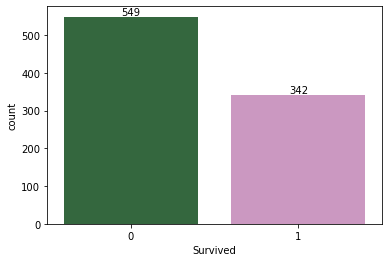

In [8]:
ax = sns.countplot(x = 'Survived', data = data_train, palette = 'cubehelix')
ax.bar_label(ax.containers[0])

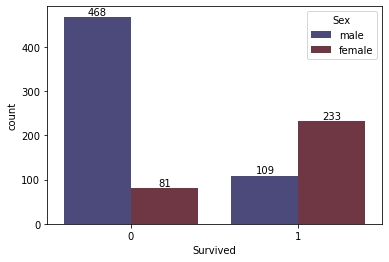

In [9]:
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = data_train, palette = 'icefire')
for container in ax.containers:
    ax.bar_label(container)

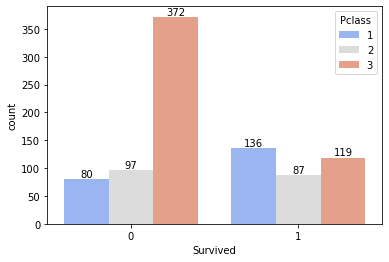

In [10]:
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = data_train, palette = 'coolwarm')
for container in ax.containers:
    ax.bar_label(container)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

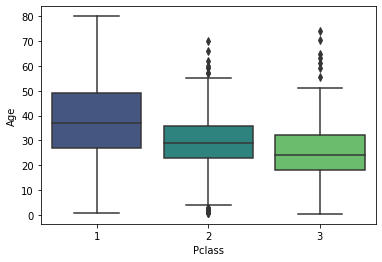

In [11]:
sns.boxplot(data_train['Pclass'], data_train['Age'], palette = 'viridis')

## Cleaning the data

<AxesSubplot:>

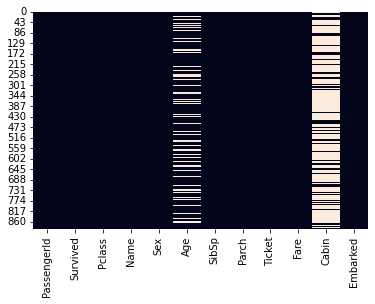

In [7]:
# Heatmap showing null values
sns.heatmap(data_train.isnull(), cbar = False)

In [12]:
# Replace Age NaN with mean Age of same Pclass
data_train['Age'] = data_train.groupby('Pclass').Age.transform(lambda x: x.fillna(x.mean()))
data_train.Age = data_train.Age.round()

In [13]:
data_test['Age'] = data_test.groupby('Pclass').Age.transform(lambda x: x.fillna(x.mean()))
data_test.Age = data_test.Age.round()

In [14]:
data_test['Fare'] = data_test.Fare.transform(lambda x: x.fillna(x.mean()))

In [16]:
print(data_train.groupby(['Pclass']).mean().groupby('Pclass')['Age'].mean().round())

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64


In [15]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [17]:
print(data_train.head(n = 10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  25.0      0   
6                            McCarthy, Mr. Timothy J    male  54

## One hot encoding

In [19]:
# One hot encoding the variables "Sex" and "Embarked"
sex = pd.get_dummies(data_train['Sex'], drop_first = True)
embarked = pd.get_dummies(data_train['Embarked'], drop_first = True)
test_sex = pd.get_dummies(data_test['Sex'], drop_first = True)
test_embarked = pd.get_dummies(data_test['Embarked'], drop_first = True)

In [18]:
data_train.drop('Cabin', axis = 1, inplace = True)
data_test.drop('Cabin', axis = 1, inplace = True)

In [20]:
data_train = pd.concat([data_train, sex, embarked], axis = 1)
data_train.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [21]:
data_test = pd.concat([data_test, test_sex, test_embarked], axis = 1)
data_test.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [23]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.0,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Training and testing the training data

In [26]:
from sklearn.model_selection import train_test_split
X = data_train.drop('Survived', axis = 1)
y = data_train['Survived']
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3)

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.metrics import average_precision_score, recall_score, f1_score, jaccard_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

## Setting up the model

In [30]:
bayes_model = GaussianNB()
bayes_model.fit(train_X, train_y)
predictions = bayes_model.predict(val_X)
print(classification_report(val_y, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       156
           1       0.78      0.68      0.72       112

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [61]:
# Evaluating the metrics for the model
accuracy = round(bayes_model.score(val_X, val_y), 3)
precision = round(precision_score(val_y, predictions), 3)
avg_prec = round(average_precision_score(val_y, predictions), 3)
noskill_prob = [[1, 0] for _ in range(len(val_y))]
no_skill_loss = round(log_loss(val_y, noskill_prob), 3)
baseline_prob = [[0.62, 0.38] for _ in range(len(val_y))]
baseline_loss = round(log_loss(val_y, baseline_prob), 3)
jacard = round(jaccard_score(val_y, predictions), 3)
bayes_metric = pd.Series({'Accuracy': accuracy, 'Precision': precision, 'Average Precision': avg_prec, 
                        'No Skill Log Loss': no_skill_loss, 'Baseline Log Loss': baseline_loss,
                          'Jaccard Score' :jacard})

In [62]:
bayes_metric

Accuracy              0.784
Precision             0.776
Average Precision     0.661
No Skill Log Loss    14.434
Baseline Log Loss     0.683
Jaccard Score         0.567
dtype: float64

Text(1.2, 1.7, 'True Predicted Survivor')

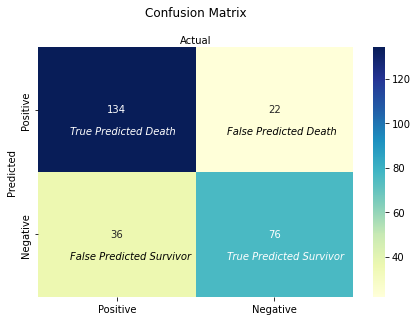

In [35]:
# Confusion Matrix
cn_mx = confusion_matrix(val_y, predictions)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cn_mx), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Predicted')
plt.xlabel('Actual')
ax.set_yticklabels(['Positive', 'Negative'])
ax.set_xticklabels(['Positive', 'Negative'])
ax.text(0.2, 0.7, 'True Predicted Death', style = 'italic', color = 'white', size = 10)
ax.text(0.2, 1.7, 'False Predicted Survivor', style = 'italic', size = 10)
ax.text(1.2, 0.7, 'False Predicted Death', style = 'italic', size = 10)
ax.text(1.2, 1.7, 'True Predicted Survivor', style = 'italic', color = 'white', size = 10)

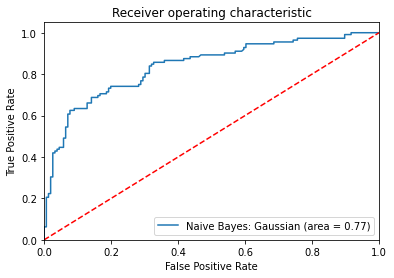

In [36]:
# Receiver Operating Characteristic (ROC) curve
roc_auc = roc_auc_score(val_y, bayes_model.predict(val_X))
fpr, tpr, thresholds = roc_curve(val_y, bayes_model.predict_proba(val_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Naive Bayes: Gaussian (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

## Hyperparameter Tuning

In [39]:
# example of grid searching key hyperparametres for naive bayes
param_grid = {'var_smoothing': np.logspace(0, -9, num = 100)}
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
grid_search = GridSearchCV(estimator = bayes_model, 
                 param_grid = param_grid, 
                 cv = cv, 
                 verbose = 1, 
                 scoring = 'accuracy') 
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best: 0.788231 using {'var_smoothing': 1.873817422860383e-05}
0.643096 (0.026789) with: {'var_smoothing': 1.0}
0.644594 (0.025467) with: {'var_smoothing': 0.8111308307896871}
0.644220 (0.025608) with: {'var_smoothing': 0.657933224657568}
0.644220 (0.025608) with: {'var_smoothing': 0.533669923120631}
0.649455 (0.025546) with: {'var_smoothing': 0.43287612810830584}
0.654320 (0.025633) with: {'var_smoothing': 0.3511191734215131}
0.658069 (0.023885) with: {'var_smoothing': 0.2848035868435802}
0.657699 (0.026198) with: {'var_smoothing': 0.23101297000831597}
0.659197 (0.027081) with: {'var_smoothing': 0.1873817422860384}
0.661444 (0.026830) with: {'var_smoothing': 0.15199110829529336}
0.662950 (0.027221) with: {'var_smoothing': 0.12328467394420659}
0.664074 (0.027884) with: {'var_smoothing': 0.1}
0.666692 (0.027631) with: {'var_smoothing': 0.08111308307896872}
0.667811 (0.028778) with: {'var_smoothing': 0.0657933224657568}
0.66

In [41]:
# Retuned parameter model
# Best: 0.788231 using {'var_smoothing': 1.873817422860383e-05}
tuned_model = GaussianNB(var_smoothing = 1.873817422860383e-05)
tuned_model.fit(train_X, train_y)
tuned_predict = tuned_model.predict(val_X)
# Get the accuracy score of model and print it
print("Accuracy of logistic regression classifier: ", tuned_model.score(val_X, val_y))
print(classification_report(val_y, tuned_predict))

Accuracy of logistic regression classifier:  0.7910447761194029
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       156
           1       0.83      0.63      0.72       112

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [59]:
# Get the accuracy score of logreg model and print it
tuned_accuracy = round(tuned_model.score(val_X, val_y), 3)
tuned_precision = round(precision_score(val_y, tuned_predict), 3)
tuned_avg_prec = round(average_precision_score(val_y, tuned_predict), 3)
noskill_prob = [[1, 0] for _ in range(len(val_y))]
no_skill_loss = round(log_loss(val_y, noskill_prob), 3)
baseline_prob = [[0.62, 0.38] for _ in range(len(val_y))]
baseline_loss = round(log_loss(val_y, baseline_prob), 3)
tuned_jacard = round(jaccard_score(val_y, tuned_predict), 3)
tuned_metric = pd.Series({'Accuracy': tuned_accuracy, 'Precision': tuned_precision,
                          'Average Precision': tuned_avg_prec, 'No Skill Log Loss': no_skill_loss,
                          'Baseline Log Loss': baseline_loss, 'Jaccard Score' :tuned_jacard})

In [60]:
tuned_metric

Accuracy              0.791
Precision             0.826
Average Precision     0.676
No Skill Log Loss    14.434
Baseline Log Loss     0.683
Jaccard Score         0.559
dtype: float64

Text(1.2, 1.7, 'True Predicted Survivor')

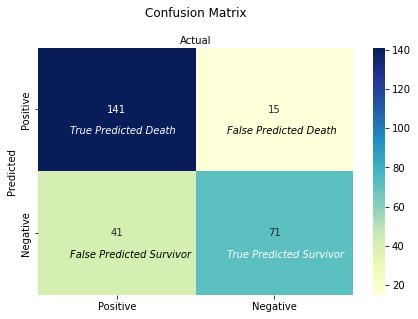

In [53]:
tuned_conmatrix = confusion_matrix(val_y, tuned_predict)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(tuned_conmatrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Predicted')
plt.xlabel('Actual')
ax.set_yticklabels(['Positive', 'Negative'])
ax.set_xticklabels(['Positive', 'Negative'])
ax.text(0.2, 0.7, 'True Predicted Death', style = 'italic', color = 'white', size = 10)
ax.text(0.2, 1.7, 'False Predicted Survivor', style = 'italic', size = 10)
ax.text(1.2, 0.7, 'False Predicted Death', style = 'italic', size = 10)
ax.text(1.2, 1.7, 'True Predicted Survivor', style = 'italic', color = 'white', size = 10)

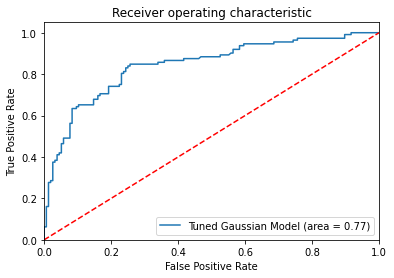

In [55]:
tuned_roc_auc = roc_auc_score(val_y, tuned_model.predict(val_X))
fpr, tpr, thresholds = roc_curve(val_y, tuned_model.predict_proba(val_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Tuned Gaussian Model (area = %0.2f)' % tuned_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [63]:
compare = pd.DataFrame.from_dict({'Bayes Model': bayes_metric, 'Tuned Bayes Model': tuned_metric})

In [64]:
compare

,Bayes Model,Tuned Bayes Model
Accuracy,0.784,0.791
Precision,0.776,0.826
Average Precision,0.661,0.676
No Skill Log Loss,14.434,14.434
Baseline Log Loss,0.683,0.683
Jaccard Score,0.567,0.559


In [56]:
bayes_pred_check = bayes_model.predict(data_test)
tuned_pred_check = tuned_model.predict(data_test)

In [58]:
bayes_survive = np.count_nonzero(bayes_pred_check == 1)
bayes_died = np.count_nonzero(bayes_pred_check == 0)
print("Survived - Bayes Model: ", bayes_survive)
print("Died - Bayes Model: ", bayes_died)
tuned_survive = np.count_nonzero(tuned_pred_check == 1)
tuned_died = np.count_nonzero(tuned_pred_check == 0)
print("Survived - Tuned Model: ", tuned_survive)
print("Died - Tuned Model: ", tuned_died)

Survived - Bayes Model:  173
Died - Bayes Model:  245
Survived - Tuned Model:  151
Died - Tuned Model:  267


## The tuned model slightly improves on the original Gaussian model. There was a slight improvement in accuracy, precision, and average precision. Accuracy improved by 0.7%, precision improved by 5%, and average precision improved by 1.5%. The original model performed better on the Jaccard score with an improvement of 0.8%.
## Although the metrics only saw a small improvement between the two models, using the tuned model would be ideal considering the 5% increase in precision.